In [2]:
from fastbook import *

In [2]:
Search_Words = ["bird", "forest"]
path = Path("images")
Search_Num = 10

# to make sure that the file is empty
!rm -r images

for W in Search_Words:
  dest = path/W
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images_ddg(f'{W} photo', max_images=Search_Num))
  time.sleep(5)
  resize_images(path/W, max_size=400, dest=path/W)

In [1]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=30),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=6)

dls.show_batch(max_n=6)

NameError: name 'DataBlock' is not defined

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [14]:
is_it,_,probs = learn.predict(PILImage.create('Examples/1.jpg'))
print(f"This is a: {is_it}.")
print(f"Probability it's a {is_it}: {max(probs[0], probs[1])}")

This is a: bird.
Probability it's a bird: 0.998842179775238


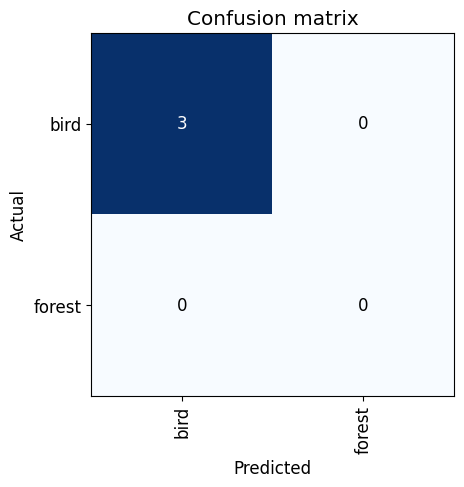

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [16]:
learn.export('BirdOrForest.pkl')